# **Credit Risk Dataset – Exploratory Data Analysis (EDA)**

This notebook performs an exploratory analysis on a dataset related to loan applications and credit risk.

The goal is to identify patterns and relationships between customer attributes and the likelihood of loan default (`loan_status`). We examine distributions, detect missing values, assess skewness, and explore both categorical and numerical variables to support future modeling tasks.


# Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**Observation:**  
The dataset contains 4 categorical (object) variables and 8 numerical variables.

In [4]:
# Calculate percentage of missing values
missing = df.isnull().sum() / df.shape[0] * 100
missing.name = "Missing (%)"
missing

,Missing (%)
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


**Observation:**  
This shows the percentage of missing values in each column.

In [5]:
# Descriptive statistics + skewness and kurtosis
df_described = df.describe().drop(['count'])
df_described.rename(index={'50%': '50% / median'}, inplace=True)

numeric_df = df.select_dtypes(include=np.number)
df_described.loc['Skewness'] = numeric_df.skew()
df_described.loc['Kurtosis'] = numeric_df.kurtosis()
df_described = df_described.T
df_described

,mean,std,min,25%,50% / median,75%,max,Skewness,Kurtosis
person_age,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00,2.581393,18.560825
person_income,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00,32.865349,2693.272776
person_emp_length,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00,2.614455,43.722338
loan_amnt,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00,1.192477,1.423565
loan_int_rate,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22,0.208550,-0.671609
loan_status,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00,1.364888,-0.137088
loan_percent_income,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83,1.064669,1.223687
cb_person_cred_hist_length,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00,1.661790,3.716194


**Observations:**  
- `person_age` is right-skewed and leptokurtic (sharp peak).  
- `loan_in_rate` is nearly symmetric and platykurtic (flat distribution).

# Distribution Analysis

Now let's visualize the distributions of the numerical variables to assess skewness and outliers.


array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>, <Axes: >]],
      dtype=object)

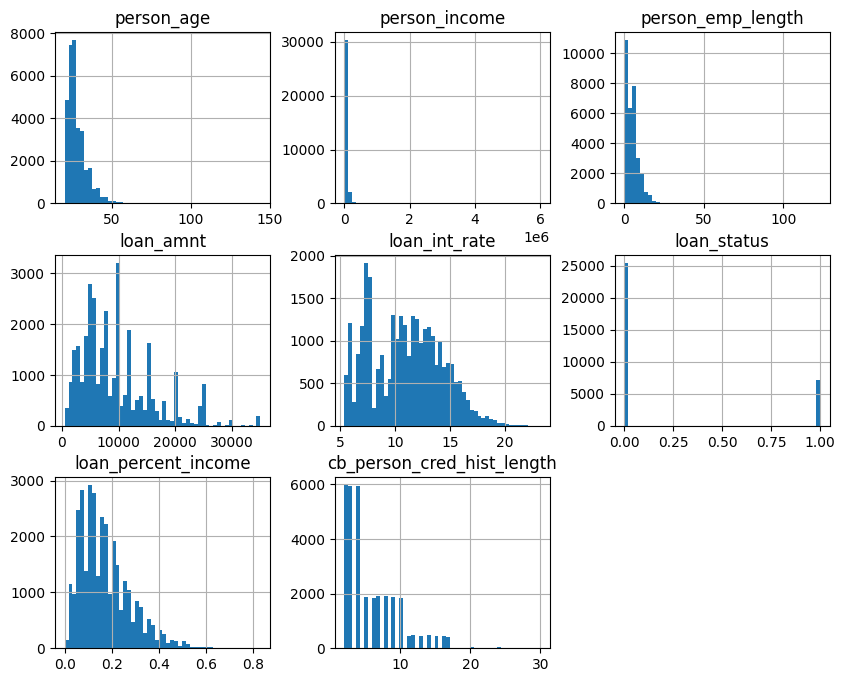

In [6]:
df.hist(figsize=(10, 8), bins=50)

**Observation:**  
The histograms generally match the calculated skewness.  
In particular, the `income` variable shows a strong **positive skew**, with such a long tail that it is barely visible in the plot.


<Axes: >

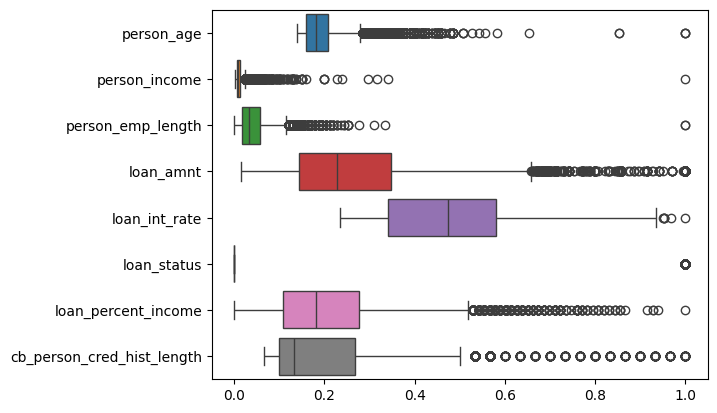

In [7]:
# Normalize numeric values to compare scales in boxplot
numeric_df = df.select_dtypes(include=np.number)
df_normalized = numeric_df / numeric_df.max()
sns.boxplot(data=df_normalized, orient='h')

**Observation:**  
The boxplot highlights potential outliers across several numerical features. This helps visualize variable dispersion on a comparable scale.


In [8]:
# Detect outliers in 'person_age' using the IQR method
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


**Observation:**  
Outliers in `person_age` were detected using the IQR method. These extreme values could impact model performance and may need to be handled appropriately.


# Categorical Variable Analysis

Let's explore the distribution of the categorical (text) variables in the dataset.



In [9]:
# Select only categorical (object) variables
df_text_values = df.select_dtypes(include=object)
df_text_values.describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


**Observation:**  
This summary provides the number of unique categories, most frequent category, and frequency for each categorical variable.


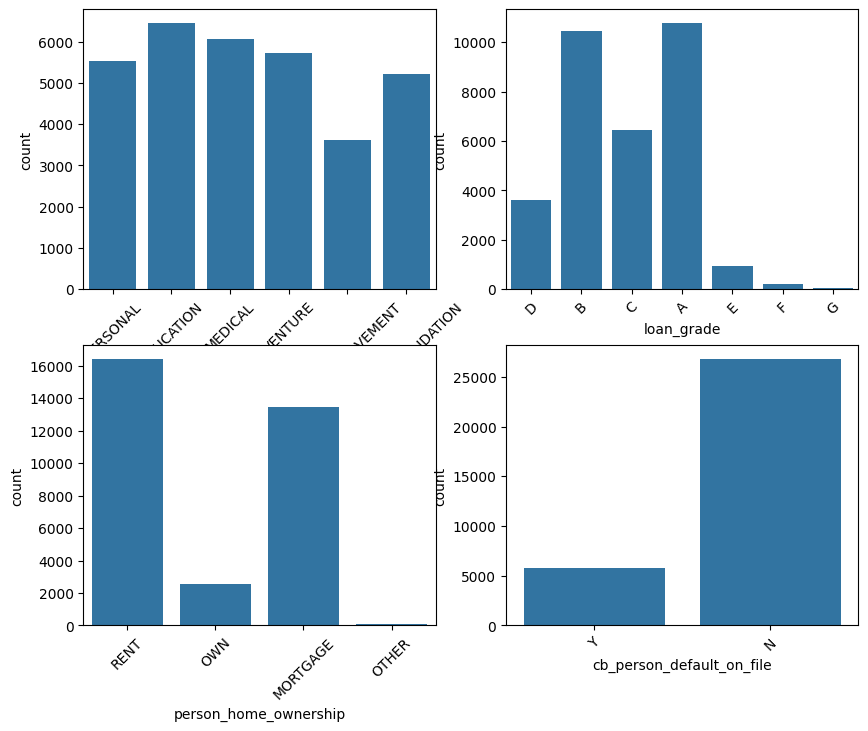

In [10]:
# Plot distribution of categorical variables
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(x='loan_intent', data=df, ax=ax[0, 0])
sns.countplot(x='loan_grade', data=df, ax=ax[0, 1])
sns.countplot(x='person_home_ownership', data=df, ax=ax[1, 0])
sns.countplot(x='cb_person_default_on_file', data=df, ax=ax[1, 1])

# Optional: Add rotation for readability
for a in ax.flat:
    a.tick_params(axis='x', rotation=45)


**Observation:**  
These countplots reveal the frequency of each category within the four main categorical variables. For example:
- Some loan intents are much more common than others.
- `loan_grade` appears to be skewed toward lower or higher risk classes.


## Correlation Analysis

In this section, we explore relationships between features and the target variable `loan_status`, using both visual and statistical methods.


<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

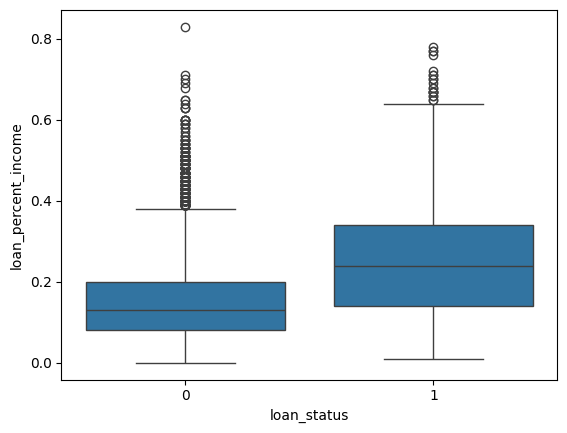

In [11]:
# Boxplot of loan_percent_income vs loan_status
sns.boxplot(data=df, x="loan_status", y="loan_percent_income")

**Observation:**  
- Most applicants with a **defaulted loan** (`loan_status == 1`) have a `loan_percent_income` between **0% and 60%**.  
- Most applicants **without default** (`loan_status == 0`) have values between **0% and 40%**.  
- This suggests that the **higher the income percentage dedicated to the loan, the greater the risk of default**.


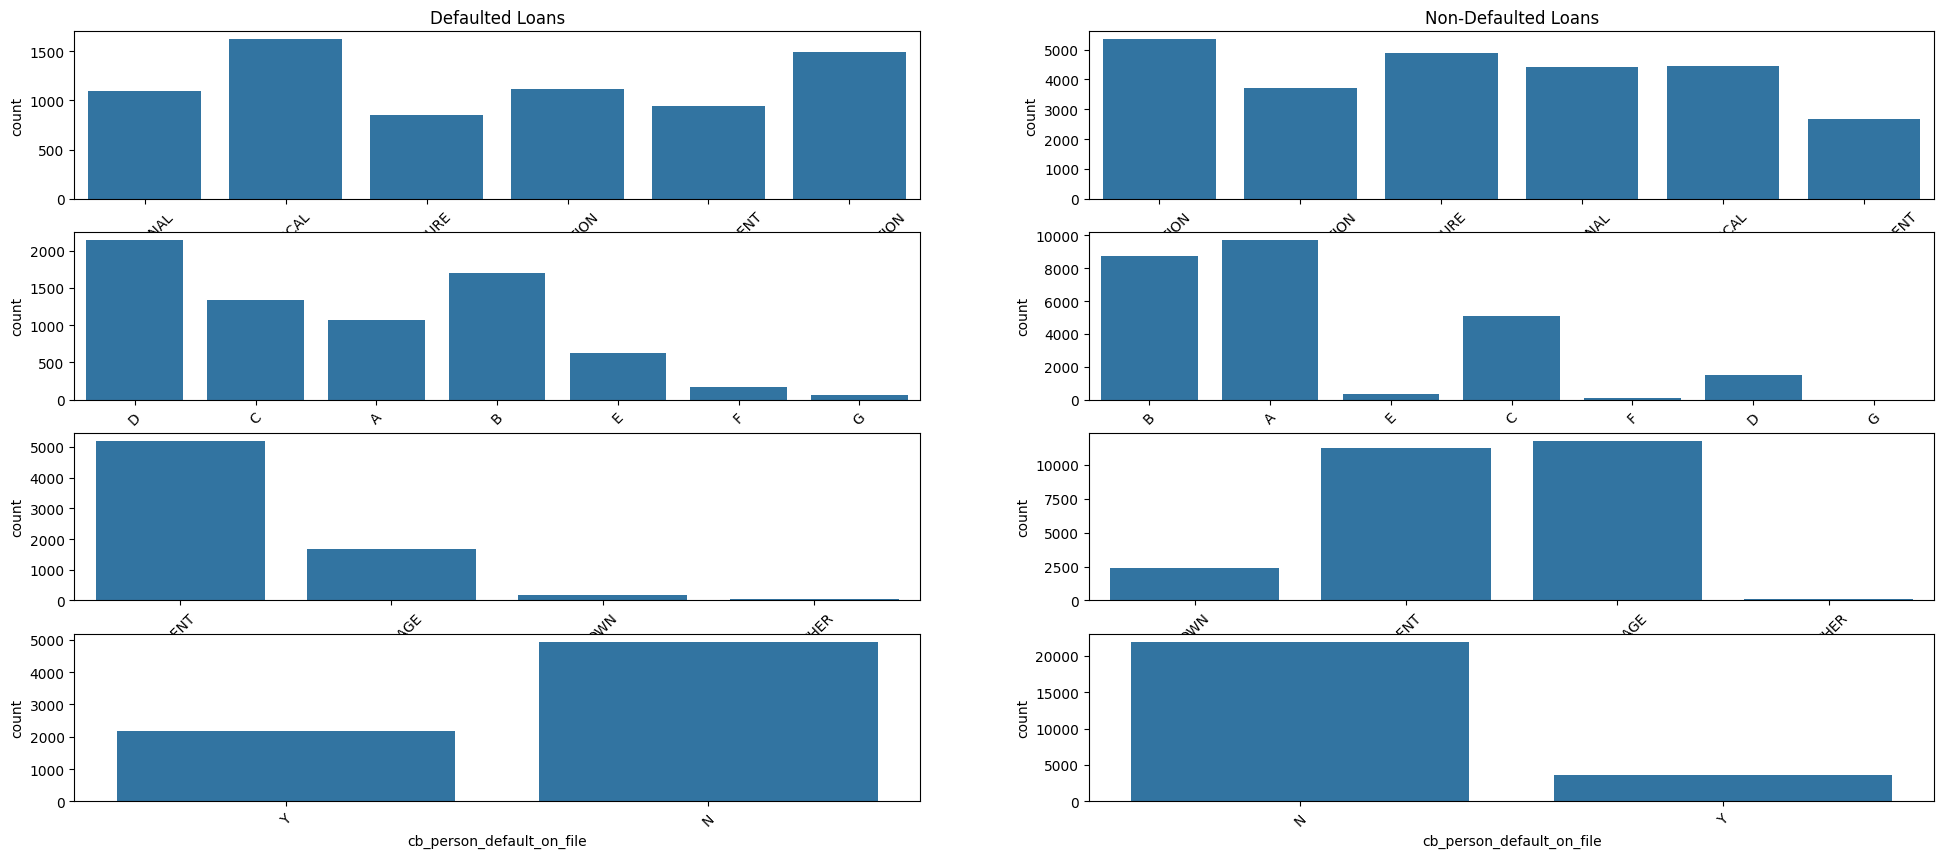

In [12]:
# Split data based on loan status
df_loan_1 = df[df['loan_status'] == 1]
df_loan_0 = df[df['loan_status'] == 0]

# Countplots for each category grouped by loan status
fig, ax = plt.subplots(4, 2, figsize=(24, 10))

sns.countplot(x='loan_intent', data=df_loan_1, ax=ax[0, 0])
sns.countplot(x='loan_grade', data=df_loan_1, ax=ax[1, 0])
sns.countplot(x='person_home_ownership', data=df_loan_1, ax=ax[2, 0])
sns.countplot(x='cb_person_default_on_file', data=df_loan_1, ax=ax[3, 0])

sns.countplot(x='loan_intent', data=df_loan_0, ax=ax[0, 1])
sns.countplot(x='loan_grade', data=df_loan_0, ax=ax[1, 1])
sns.countplot(x='person_home_ownership', data=df_loan_0, ax=ax[2, 1])
sns.countplot(x='cb_person_default_on_file', data=df_loan_0, ax=ax[3, 1])

ax[0][0].set_title("Defaulted Loans")
ax[0][1].set_title("Non-Defaulted Loans")

# Rotate x-axis labels for readability
for a in ax.flat:
    a.tick_params(axis='x', rotation=45)


**Observation:**  
These plots compare categorical feature distributions between defaulted and non-defaulted loans.  
This helps identify patterns associated with higher or lower credit risk.


<Axes: >

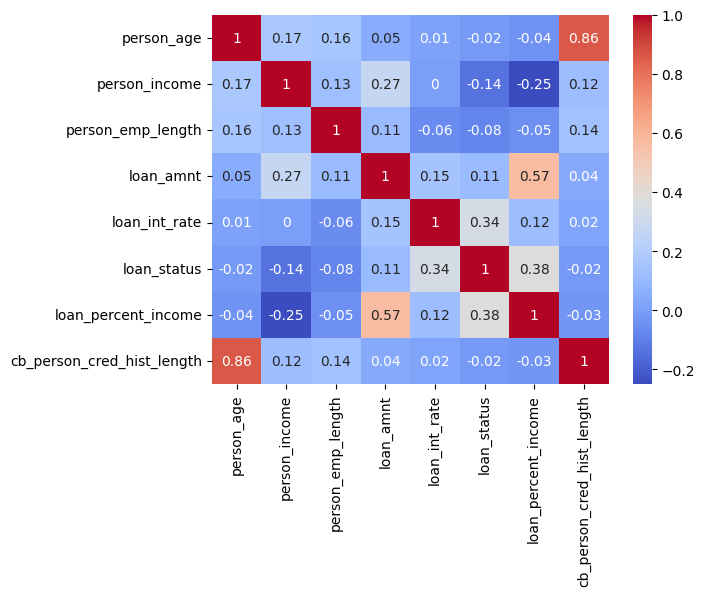

In [13]:
# Heatmap of correlation between numerical variables
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(round(numeric_df.corr(), 2), annot=True, cmap="coolwarm")


**Observation:**  
- The variable most strongly correlated with `loan_status` is `loan_percent_income` (**0.38**), followed by `loan_int_rate` (**0.34**).  
- This makes intuitive sense: both a high interest rate and high income burden increase the difficulty of repaying the loan.


From the exploratory analysis, we found that:

- Higher values of `loan_percent_income` and `loan_int_rate` are associated with a greater risk of default.
- Certain loan intents and credit grades appear more frequently among defaulted loans.
- `person_age` and `person_income` show strong right-skewed distributions with potential outliers.
- Several categorical variables show distinct patterns when grouped by loan status.

These insights can inform the feature engineering and model selection steps for a future credit risk classification model.
